# Maximizing Revenue for Taxi Drivers through Payment Type Analysis...


## Problem Statement
use data driven insights to maximize revenue for taxi drivers. This research aims to determine whether payment methods have an impact on fare pricing by focusing on relationship between payment type and fair amount


### Objective
Run A/B testing to examine the relationship between total fare and method of payment. Use hypothesis testing and desc stats to extract useful info... find out if there is big difference in the fares for those who pay with credit cards vs who pay with cash...


## The Question
Is there a relationship between total fare amount and payment type and can we make customers change their payment method towards that which generated higher revenue... without negatively impacting customer experience 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [2]:
df = pd.read_csv('yellow_tripdata_2020-01.csv')

C:\Users\krish\AppData\Local\Temp\ipykernel_19104\3495846521.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('yellow_tripdata_2020-01.csv')


In [3]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


In [4]:
df.shape

(6405008, 18)

In [5]:
df.dtypes

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

In [6]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [7]:
df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']

In [8]:
df.dtypes

VendorID                         float64
tpep_pickup_datetime      datetime64[ns]
tpep_dropoff_datetime     datetime64[ns]
passenger_count                  float64
trip_distance                    float64
RatecodeID                       float64
store_and_fwd_flag                object
PULocationID                       int64
DOLocationID                       int64
payment_type                     float64
fare_amount                      float64
extra                            float64
mta_tax                          float64
tip_amount                       float64
tolls_amount                     float64
improvement_surcharge            float64
total_amount                     float64
congestion_surcharge             float64
duration                 timedelta64[ns]
dtype: object

In [9]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5,0 days 00:04:48
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5,0 days 00:07:25
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5,0 days 00:06:11
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0,0 days 00:04:51
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0,0 days 00:02:18


In [10]:
df['duration'] = df['duration'].dt.total_seconds()/60
df['duration']

0           4.800000
1           7.416667
2           6.183333
3           4.850000
4           2.300000
             ...    
6405003    31.000000
6405004    76.000000
6405005    27.833333
6405006    22.650000
6405007    22.000000
Name: duration, Length: 6405008, dtype: float64

In [11]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,6.00,3.00,0.5,1.47,0.00,0.3,11.27,2.5,4.800000
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,7.00,3.00,0.5,1.50,0.00,0.3,12.30,2.5,7.416667
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,6.00,3.00,0.5,1.00,0.00,0.3,10.80,2.5,6.183333
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,5.50,0.50,0.5,1.36,0.00,0.3,8.16,0.0,4.850000
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2.0,3.50,0.50,0.5,0.00,0.00,0.3,4.80,0.0,2.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405003,NaN,2020-01-31 22:51:00,2020-01-31 23:22:00,NaN,3.24,NaN,NaN,237,234,NaN,17.59,2.75,0.5,0.00,0.00,0.3,21.14,0.0,31.000000
6405004,NaN,2020-01-31 22:10:00,2020-01-31 23:26:00,NaN,22.13,NaN,NaN,259,45,NaN,46.67,2.75,0.5,0.00,12.24,0.3,62.46,0.0,76.000000
6405005,NaN,2020-01-31 22:50:07,2020-01-31 23:17:57,NaN,10.51,NaN,NaN,137,169,NaN,48.85,2.75,0.0,0.00,0.00,0.3,51.90,0.0,27.833333
6405006,NaN,2020-01-31 22:25:53,2020-01-31 22:48:32,NaN,5.49,NaN,NaN,50,42,NaN,27.17,2.75,0.0,0.00,0.00,0.3,30.22,0.0,22.650000


In [12]:
# selecting usable information only 
df = df[['passenger_count', 'payment_type', 'fare_amount', 'trip_distance', 'duration']]

In [13]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,1.0,6.00,1.20,4.800000
1,1.0,1.0,7.00,1.20,7.416667
2,1.0,1.0,6.00,0.60,6.183333
3,1.0,1.0,5.50,0.80,4.850000
4,1.0,2.0,3.50,0.00,2.300000
...,...,...,...,...,...
6405003,NaN,NaN,17.59,3.24,31.000000
6405004,NaN,NaN,46.67,22.13,76.000000
6405005,NaN,NaN,48.85,10.51,27.833333
6405006,NaN,NaN,27.17,5.49,22.650000


In [14]:
df.isnull().sum()

passenger_count    65441
payment_type       65441
fare_amount            0
trip_distance          0
duration               0
dtype: int64

In [15]:
# how much these rown contribute in the data
(65441 / len(df))*100

1.021716132126611

In [16]:
#since, just 1% so, we drop these rows...
df = df.dropna()

In [17]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,1.0,6.0,1.20,4.800000
1,1.0,1.0,7.0,1.20,7.416667
2,1.0,1.0,6.0,0.60,6.183333
3,1.0,1.0,5.5,0.80,4.850000
4,1.0,2.0,3.5,0.00,2.300000
...,...,...,...,...,...
6339562,1.0,1.0,11.0,2.10,14.233333
6339563,1.0,1.0,13.0,2.13,19.000000
6339564,1.0,1.0,12.5,2.55,16.283333
6339565,1.0,2.0,8.5,1.61,9.633333


In [18]:
df['passenger_count'] = df['passenger_count'].astype('int64')
df

C:\Users\krish\AppData\Local\Temp\ipykernel_19104\2500255633.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['passenger_count'] = df['passenger_count'].astype('int64')


,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,1.0,6.0,1.20,4.800000
1,1,1.0,7.0,1.20,7.416667
2,1,1.0,6.0,0.60,6.183333
3,1,1.0,5.5,0.80,4.850000
4,1,2.0,3.5,0.00,2.300000
...,...,...,...,...,...
6339562,1,1.0,11.0,2.10,14.233333
6339563,1,1.0,13.0,2.13,19.000000
6339564,1,1.0,12.5,2.55,16.283333
6339565,1,2.0,8.5,1.61,9.633333


In [19]:
df['payment_type'] = df['payment_type'].astype('int32')

C:\Users\krish\AppData\Local\Temp\ipykernel_19104\158946779.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['payment_type'] = df['payment_type'].astype('int32')


In [20]:
df = df.drop_duplicates()

In [21]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,1,6.0,1.20,4.800000
1,1,1,7.0,1.20,7.416667
2,1,1,6.0,0.60,6.183333
3,1,1,5.5,0.80,4.850000
4,1,2,3.5,0.00,2.300000
...,...,...,...,...,...
6339555,3,1,10.0,2.09,14.800000
6339561,1,1,17.5,4.11,21.500000
6339563,1,1,13.0,2.13,19.000000
6339564,1,1,12.5,2.55,16.283333


In [22]:
df['passenger_count'].value_counts()

passenger_count
1    1750518
2     572547
3     199602
5     189305
6     118124
4     108422
0      69280
7         28
9         18
8         17
Name: count, dtype: int64

In [23]:
# it is not passible of a ride with zero passengers.... we'll remove it
# also remove 7, 8, 9 because of their less contributiom
df = df[(df['passenger_count'] > 0) & (df['passenger_count'] < 6)]
df = df[df['payment_type'] < 3] # also removing other payment methods beause we wanna make indights about card and cash only...
df.head()

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,1,6.0,1.2,4.800000
1,1,1,7.0,1.2,7.416667
2,1,1,6.0,0.6,6.183333
3,1,1,5.5,0.8,4.850000
4,1,2,3.5,0.0,2.300000


In [24]:
df.shape

(2780283, 5)

In [25]:
df['payment_type'].replace([1, 2], ['Card', 'Cash'], inplace = True)
df.sample(5)

C:\Users\krish\AppData\Local\Temp\ipykernel_19104\3343329136.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['payment_type'].replace([1, 2], ['Card', 'Cash'], inplace = True)


,passenger_count,payment_type,fare_amount,trip_distance,duration
651474,5,Card,52.0,19.69,43.933333
115457,1,Card,8.5,2.00,8.733333
363944,1,Card,29.0,9.66,27.716667
4239023,1,Cash,13.5,3.11,15.616667
1969021,2,Cash,9.0,1.40,10.883333


In [26]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,Card,6.0,1.20,4.800000
1,1,Card,7.0,1.20,7.416667
2,1,Card,6.0,0.60,6.183333
3,1,Card,5.5,0.80,4.850000
4,1,Cash,3.5,0.00,2.300000
...,...,...,...,...,...
6339555,3,Card,10.0,2.09,14.800000
6339561,1,Card,17.5,4.11,21.500000
6339563,1,Card,13.0,2.13,19.000000
6339564,1,Card,12.5,2.55,16.283333


In [27]:
df['payment_type'] = df['payment_type'].astype('category')

In [28]:
df.describe()

,passenger_count,fare_amount,trip_distance,duration
count,2.780283e+06,2.780283e+06,2.780283e+06,2.780283e+06
mean,1.733386e+00,1.780567e+01,4.536729e+00,2.415478e+01
std,1.176652e+00,1.506997e+01,4.895890e+00,9.260031e+01
min,1.000000e+00,-5.000000e+02,-2.218000e+01,-2.770367e+03
25%,1.000000e+00,9.000000e+00,1.500000e+00,9.883333e+00
50%,1.000000e+00,1.300000e+01,2.730000e+00,1.573333e+01
75%,2.000000e+00,2.100000e+01,5.470000e+00,2.336667e+01
max,5.000000e+00,4.265000e+03,2.628800e+02,8.525117e+03


In [29]:
# how can the values be negative
df = df[df['fare_amount'] > 0]
df = df[df['trip_distance']>0]
df = df[df['duration']>0]

In [30]:
df.describe()

,passenger_count,fare_amount,trip_distance,duration
count,2.748932e+06,2.748932e+06,2.748932e+06,2.748932e+06
mean,1.738151e+00,1.766835e+01,4.583313e+00,2.418261e+01
std,1.179440e+00,1.447531e+01,4.897806e+00,9.272285e+01
min,1.000000e+00,1.000000e-02,1.000000e-02,1.666667e-02
25%,1.000000e+00,9.000000e+00,1.530000e+00,9.950000e+00
50%,1.000000e+00,1.300000e+01,2.770000e+00,1.575000e+01
75%,2.000000e+00,2.100000e+01,5.500000e+00,2.333333e+01
max,5.000000e+00,4.265000e+03,2.628800e+02,8.525117e+03


(array([2.748913e+06, 1.600000e+01, 1.000000e+00, 0.000000e+00,
        1.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 1.000000e+00]),
 array([1.000000e-02, 4.265090e+02, 8.530080e+02, 1.279507e+03,
        1.706006e+03, 2.132505e+03, 2.559004e+03, 2.985503e+03,
        3.412002e+03, 3.838501e+03, 4.265000e+03]),
 <BarContainer object of 10 artists>)

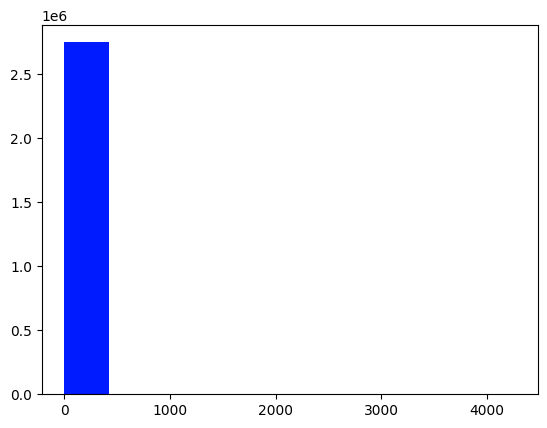

In [31]:
plt.hist(df['fare_amount'], color = '#001BFF')

<Axes: >

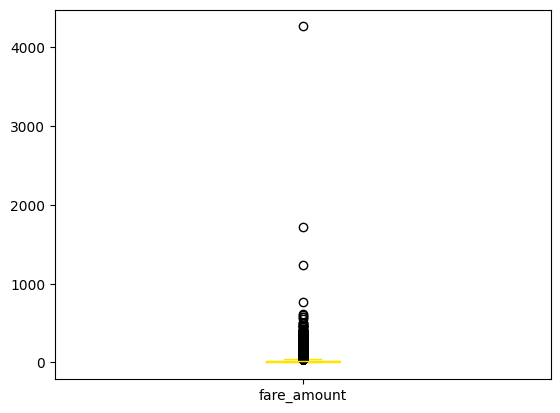

In [32]:
df['fare_amount'].plot(kind = 'box', color = '#ffe400')

In [33]:
# We'll use IQR
for col in ['fare_amount', 'duration', 'trip_distance']:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3 - q1

    lower_bound = q1 - 1.5*IQR
    upper_bound = q3 + 1.5*IQR

    df = df[(df[col] >=lower_bound) & (df[col] <= upper_bound)]

<Axes: >

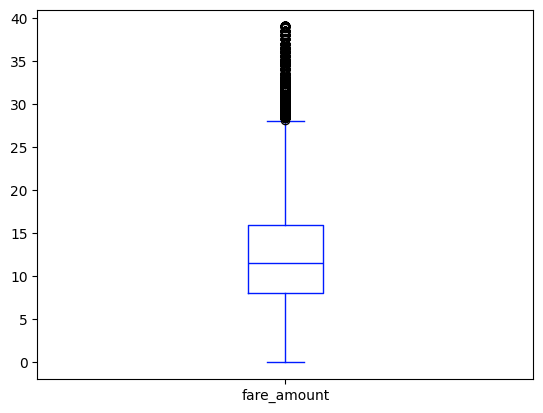

In [34]:
df['fare_amount'].plot(kind = 'box', color = '#001BFF')

In [35]:
df.describe()

,passenger_count,fare_amount,trip_distance,duration
count,2.293488e+06,2.293488e+06,2.293488e+06,2.293488e+06
mean,1.789506e+00,1.263394e+01,2.836633e+00,1.470504e+01
std,1.212117e+00,5.761282e+00,1.926980e+00,7.447893e+00
min,1.000000e+00,1.000000e-02,1.000000e-02,1.666667e-02
25%,1.000000e+00,8.000000e+00,1.380000e+00,9.033333e+00
50%,1.000000e+00,1.150000e+01,2.320000e+00,1.391667e+01
75%,2.000000e+00,1.600000e+01,3.800000e+00,1.948333e+01
max,5.000000e+00,3.900000e+01,8.680000e+00,3.850000e+01


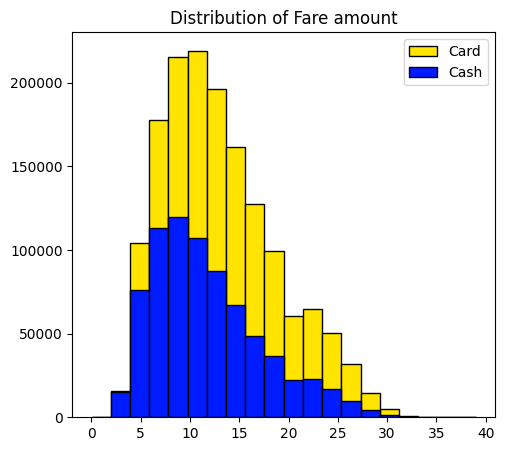

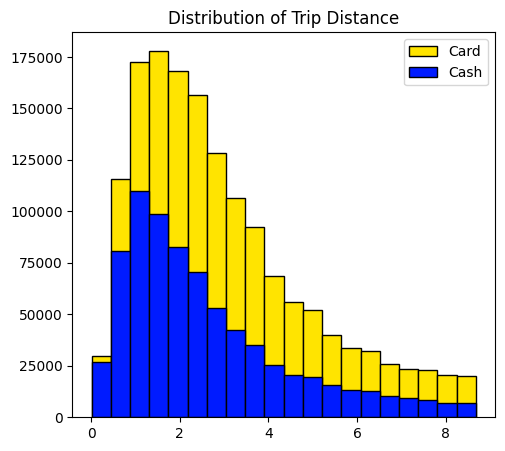

In [36]:
plt.figure(figsize = (12, 5))
plt.subplot(1,2,1)
plt.title('Distribution of Fare amount')
plt.hist(df[df['payment_type'] == 'Card']['fare_amount'], histtype = 'barstacked', bins = 20, edgecolor = 'k', color = '#ffe400', label = 'Card')
plt.hist(df[df['payment_type'] == 'Cash']['fare_amount'], histtype = 'barstacked', bins = 20, edgecolor = 'k', color = '#001BFF', label = 'Cash')
plt.legend()

plt.figure(figsize = (12, 5))
plt.subplot(1,2,1)
plt.title('Distribution of Trip Distance')
plt.hist(df[df['payment_type'] == 'Card']['trip_distance'], histtype = 'barstacked', bins = 20, edgecolor = 'k', color = '#ffe400', label = 'Card')
plt.hist(df[df['payment_type'] == 'Cash']['trip_distance'], histtype = 'barstacked', bins = 20, edgecolor = 'k', color = '#001BFF', label = 'Cash')
plt.legend()

plt.show()

In [37]:
df.groupby('payment_type').agg({'fare_amount': ['mean', 'std'], 'trip_distance': ['mean', 'std']})

C:\Users\krish\AppData\Local\Temp\ipykernel_19104\2360177839.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('payment_type').agg({'fare_amount': ['mean', 'std'], 'trip_distance': ['mean', 'std']})


fare_amount           trip_distance          
                    mean       std          mean       std
payment_type                                              
Card           13.075037  5.801126      2.962168  1.942152
Cash           11.725285  5.569285      2.578033  1.868956

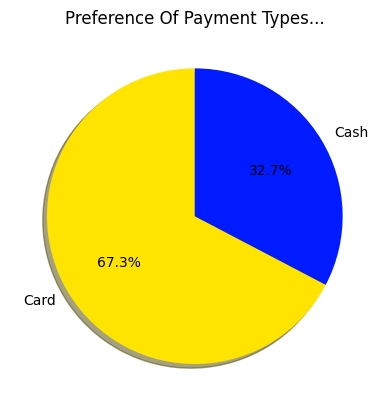

In [38]:
plt.title("Preference Of Payment Types...")
plt.pie(df['payment_type'].value_counts(normalize = True), labels = df['payment_type'].value_counts().index, startangle = 90, shadow = True, 
        autopct = '%1.1f%%', colors = ["#ffe400", "#001BFF"])
plt.show()

In [39]:
count_types = df.groupby(['payment_type', 'passenger_count'])[['passenger_count']].count()

C:\Users\krish\AppData\Local\Temp\ipykernel_19104\196160272.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_types = df.groupby(['payment_type', 'passenger_count'])[['passenger_count']].count()


In [40]:
count_types['perc'] = (count_types['passenger_count']/count_types['passenger_count'].sum())*100

In [41]:
count_types

passenger_count       perc
payment_type passenger_count                            
Card         1                         906960  39.545007
             2                         327241  14.268267
             3                         122314   5.333100
             4                          63580   2.772197
             5                         123882   5.401467
Cash         1                         459470  20.033678
             2                         155310   6.771782
             3                          54467   2.374854
             4                          32714   1.426386
             5                          47550   2.073261

In [42]:
# Making a CUSTOM DATAFRAME for visualization

df2 = pd.DataFrame(columns = ["payment_types", 1, 2, 3, 4, 5])
df2["payment_types"] = ["Card", "Cash"]
df2.iloc[0, 1:] = count_types.iloc[0:5, -1]
df2.iloc[1, 1:] = count_types.iloc[5:, -1]
df2

,payment_types,1,2,3,4,5
0,Card,39.545007,14.268267,5.3331,2.772197,5.401467
1,Cash,20.033678,6.771782,2.374854,1.426386,2.073261


<Axes: ylabel='payment_types'>

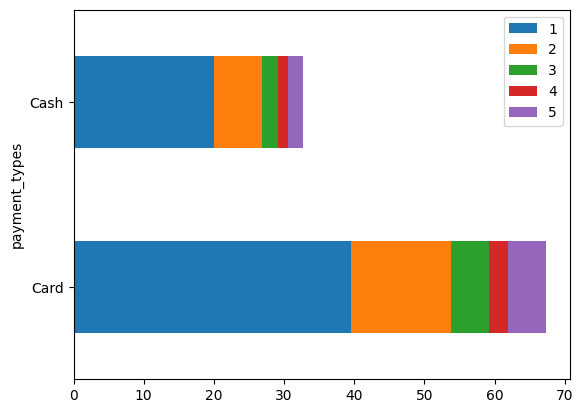

In [43]:
df2.plot(x = 'payment_types', kind = 'barh', stacked = True)


## Hypothesis Testing


#### H0: There is no difference in avg fare between customers who use card vs cash 
#### H1: There is a difference in avg fare between customers who use card vs cash  -> two tailed it is(no more than no less than)

In [45]:
pip install statsmodels

   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.5 MB 2.1 MB/s eta 0:00:05
   ----- ---------------------------------- 1.3/9.5 MB 3.0 MB/s eta 0:00:03
   ------- -------------------------------- 1.8/9.5 MB 2.8 MB/s eta 0:00:03
   --------- ------------------------------ 2.4/9.5 MB 2.9 MB/s eta 0:00:03
   ------------ --------------------------- 2.9/9.5 MB 2.8 MB/s eta 0:00:03
   -------------- ------------------------- 3.4/9.5 MB 2.8 MB/s eta 0:00:03
   ---------------- ----------------------- 3.9/9.5 MB 2.8 MB/s eta 0:00:03
   ------------------- -------------------- 4.7/9.5 MB 2.8 MB/s eta 0:00:02
   --------------------- ------------------ 5.2/9.5 MB 2.8 MB/s eta 0:00:02
   ------------------------ --------------- 5.8/9.5 MB 2.7 MB/s eta 0:00:02
   ------------------------- -------------- 6.0/9.5 MB 2.6 MB/s eta 0:00:02
   ---------------------------- ----------- 6.8/9.5 MB 2.7 MB/s eta 0:00:02
   ----------------


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [50]:
import statsmodels.api as sm

### Lets Check which test can we run on this..
to check, we will first check if this lies under normal distribution
to check normal distribution, we will make QQ Plot

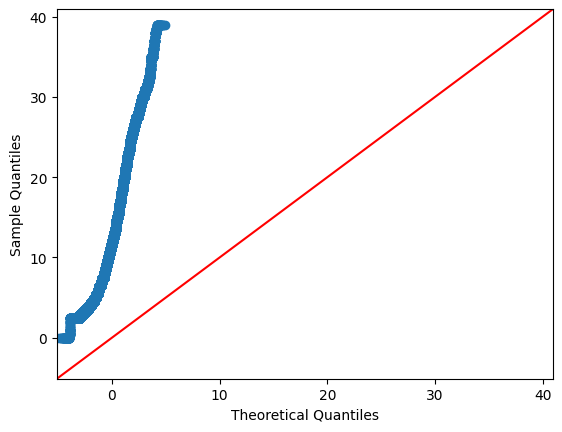

In [53]:
sm.qqplot(df["fare_amount"], line = '45')
plt.show()

### The data is not normally distributed...
So, now we will use ttest

In [58]:
card_sample = df[df["payment_type"] == "Card"]['fare_amount']
cash_sample = df[df["payment_type"] == "Cash"]['fare_amount']

In [62]:
t_stats, p_value = st.ttest_ind(a = card_sample, b = cash_sample, equal_var = False)
print("T Statistic:",t_stats)
print("P Value:",p_value)

T Statistic: 169.811469975341
P Value: 0.0


### P_value is less than the significant value 0.05 so, we reject null hypothesis

 ### WE can say that yes, our hypothesis that There is a difference in avg fare between customers who use card vs cash